In [8]:
"""
Landon Buell
Marek Petrik
CS 750.01
26 Feb 2020
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Problem 1 [25%] 
### It is mentioned in Chapter 7 of ISL that a cubic regression spline with one knot at ξ can be obtained using a basis of the form $x$, $x^2$, $x^3$, $[x−\xi]^3_+$, where $[x−\xi]^3_+ = (x−\xi)^3$ if $x > \xi$ and equals 0 otherwise. We will now show that a function of the form 
$$f(x) = \beta_0 + \beta_1x + \beta_2x^2 +\beta_3x^3 + \beta_4[x−\xi]^3_+ $$

### is indeed a cubic regression spline, regardless of the values of $\beta_0$,$\beta_1$,$\beta_2$, $\beta_3$,$\beta_4$. 


#### 1. Find a cubic polynomial
$$ f_1(x)= a_1 +b_1x + c_1x^2 +d_1x^3 $$ 
#### such that $f(x)= f_1(x)$ for all $x \leq \xi$. Express $a_1$,$b_1$,$c_1$,$d_1$ in terms of $\beta_0$,$\beta_1$,$\beta_2$, $\beta_3$,$\beta_4$.. 

The values of each coefficient are found from the corresponding order of the polynomial. Thus: 
$$ a_1 = \beta_0 , b_1 = \beta_1 , c_1 = \beta_2, d_1 = \beta_3 $$ 


#### 2. Find a cubic polynomial
$$f_2(x)= a_2 +b_2x+c_2x^2 +d_2x^3 $$
#### such that $f(x) = f_2(x)$ for all $x > \xi$. Express $a_2$,$b_2$,$c_2$,$d_2$ in terms of $\beta_0$,$\beta_1$,$\beta_2$, $\beta_3$,$\beta_4$. We have now established that $f(x)$ is a piecewise polynomial. 

We can expand the $\beta_4$ term to show that: $[x - \xi]^3 = x^3 - \xi^3 +3x\xi^2 - 3x^2\xi $
Thus we can show that:
$$ d_2 = (\beta_3 + \beta_4) $$
$$ c_2 = (\beta_2 - 3\beta_4\xi) $$
$$ b_2 = (\beta_1 + 3\beta_4\xi^2) $$
$$ a_2 = (\beta_0 -\beta_4\xi^3) $$
This the function $f_2(x)$ is defined:
$$ f_2(x) = (\beta_0 -\beta_4\xi^3) +  (\beta_1 + 3\beta_4\xi^2)x + (\beta_2 - 3\beta_4\xi)x^2 + (\beta_3 + \beta_4)x^3 $$

### 3. Show that $f_1(\xi) = f_2(\xi)$. That is, $f(x)$ is continuous at $\xi$. 
We can evaluate both functions at $x = \xi$ , which forces the evauation of $[x - \xi]^3$ to go to zero, thus both functions meet where $x = \xi$, and allows the polynomail to be both peice-wise defined as well as continuous over the interval of interest.

# Problem 2 [25%] 
### Use linear, cubic, and natural regression splines investigated Chapter 7 of ISL to the "Auto" data set. Is there evidence for non-linear relationships in this data set? Create some informative plots to justify your answer. 

In [23]:
# Loading in the auto data csv file in a pandas DataFrame object
autodata = pd.read_csv('auto.csv').sort_values(by=['mpg'])
mpg = autodata['mpg']
hpr = autodata['horsepower']

""" Please note: This silution has been modifed from Jordi Warmenhoven's Github repo:
https://github.com/JWarmenhoven/ISLR-python/blob/master/Notebooks/Chapter%207.ipynb
"""

from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sma
import statsmodels.formula.api as smf
from patsy import dmatrix

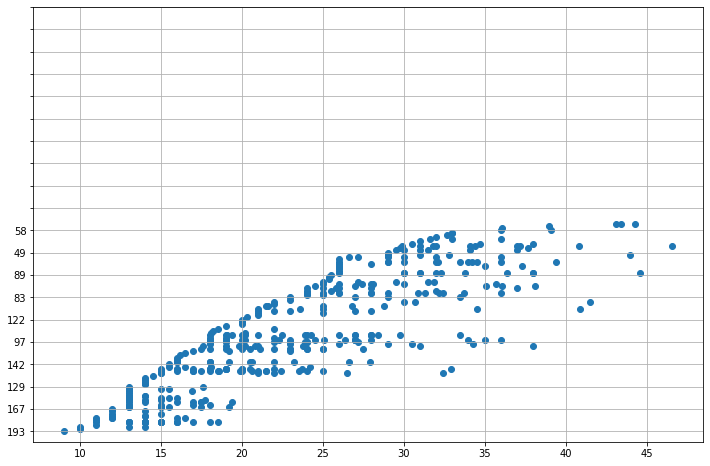

In [27]:
plt.figure(figsize=(12,8))
plt.scatter(mpg,hpr)
plt.yticks(np.arange(0,200,10))
plt.grid()
plt.show()

In [7]:
""" Linear Spline """



' Linear Spline '

# Problem 3 [25%] 
### You will now derive the Bayesian connection to the lasso as discussed in Section 6.2.2. of ISL.

#### 1. Suppose that $y_i = \beta_0 +\sum_{j=1}^{p} x_{ij}\beta_j + \epsilon_i$ where $\epsilon_1 , ... , \epsilon_n $ are independent and identically distributed from a normal distribution $N(0,1)$. Write out the likelihood for the data as a function of values $\beta$.

Likihood function is given in ISL, eqn. (4.5):
$$ l(\beta_0,\beta_1) = \prod_{i:y_i=1}p(x_i) \prod_{i':y_{i'}=0}(1-p(x_{i'})) $$
Where $p(x)$ is the logisitic function:
$$ p(X) = \frac{e^{\beta_0+\beta_1X}}{1+e^{\beta_0+\beta_1X}} $$
Thus we can re-write the likihood function for the Gaussian as:
$$ \frac{1}{(2\pi)^{n/2}}\prod_{i=0}^{n}e^{-\frac{\epsilon^2_i}{2}} $$

# Problem 4 [25%] 
### Based on a true story, according to: The Drunkard’s Walk: How Randomness Rules Our Lives, Leonard Mlodinow Suppose that you applied for a life insurance and underwent a physical exam. The bad news is that your application was rejected because you tested positive for HIV. The test’s sensitivity is 99.7% and speciﬁcity is 98.5% 
#### [https://en.wikipedia.org/wiki/Diagnosis_of_HIV/AIDS#Accuracy_of_HIV_testing]. 
### However, after studying the CDC website, you ﬁnd that in your ethnic group (age, gender, race, ...) only one in 10,000 people is infected. What is the probability that you actually have HIV?


Sensitivity:
$$ Sens = \frac{TP}{TP+FN} $$
Specificity:
$$ Spec = \frac{TN}{TN + FP} $$

Sensitivity the ratio of correct diagnoses to the total revelent cases. It is the case of how many correct idenfications that there are. Thus, this score tells me that the test has a 99.7% chance of correctly identifying a case. Specificity is the ratio of correct passes to the total number of passes of the test. This score tells me that the test has a 98.5% chance of correctly identifying not having a case correctly.
This being said, this is now a 1.5% chance that I have been misdiagnoised with HIV given that particular test. 